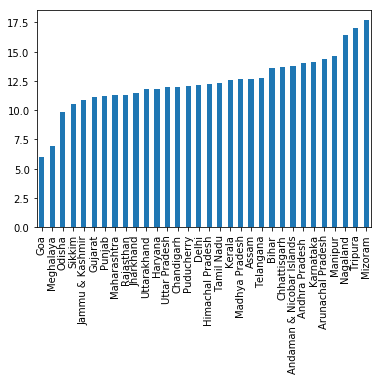

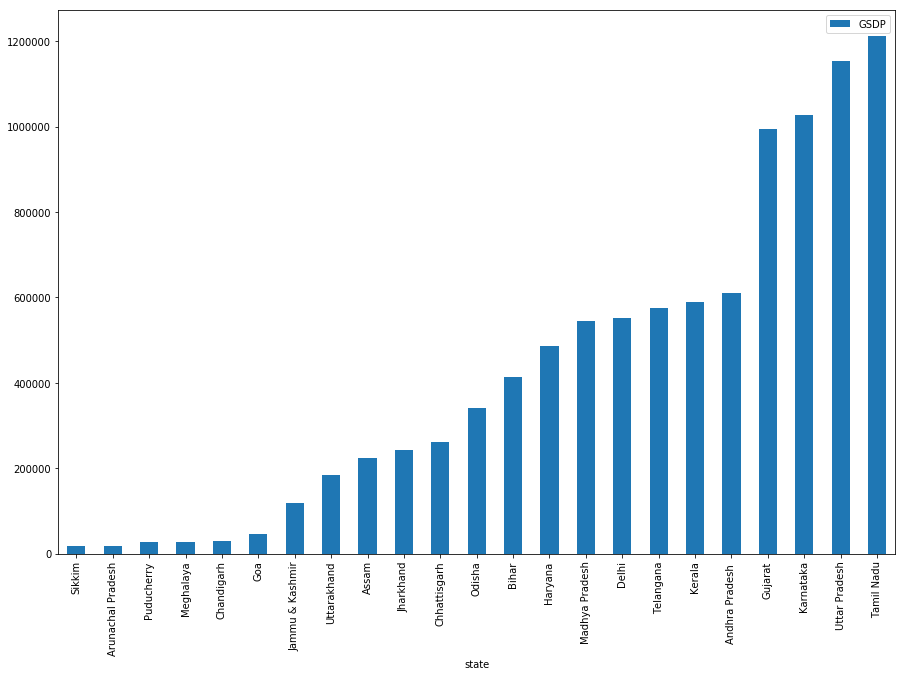

In [14]:
import pandas as pd

# 1-A
# Read csv file into a pandas dataframe
df = pd.read_csv("GDP Data\Data I-A.csv")

# Take a look at the first few rows
df.head()

# rows of dataframe
len(df)

#Drop if one column is all null
df = df.dropna(axis=1, how='all')

# Remove the row for year 2016-2017
df = df[df.Duration != '2016-17']

#Duration to be select
array = ['2013-14', '2014-15','2015-16']

# Dropping not required field
df = df.drop(['All_India GDP'], axis=1)

# Average growth of the states 
df_avg= df.loc[(df['Items  Description'] == '(% Growth over previous year)') & df['Duration'].isin(array)].mean(skipna=True).rename('avgGDP').sort_values(ascending= True)
df_avg

# Consistently fast - Mizoram,Tripura,Nagaland,Manipur,Arunachal Pradesh
# Struggling - Goa,Meghalaya,Odisha,Sikkim, Jammu & Kashmir
df_avg.dropna().plot(kind='bar')

#plotting the gdp of states year 2015-2016
array = ['2015-16']
df_gdp= df.loc[(df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)") & df['Duration'].isin(array)]
# Dropped the not needed columne
df_gdp = df_gdp.drop(['Items  Description'], axis=1)
df_gdp = df_gdp.drop(['Duration'], axis=1)

#Transposed the dataframe
df_gdp = df_gdp.T
# Rename the index and columne
df_gdp.index.name = 'state'
df_gdp.columns = ['GSDP']

#Drop the na fields
df_gdp =df_gdp.dropna( how='all')
# Sort by GSDP
df_gdp =df_gdp.sort_values(by=['GSDP'])

#Top 5 - TamilNadu,Uttarpradesh,Karnataka,Gurajart,Andhra Pradesh
#Bottom 5 - Sikkim.Arunachal,Meghalaya,Pondicherry,Chandigarh
df_gdp.plot(kind='bar',figsize=(15,10))


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Agriculture, forestry and fishing                                       24.323490
Trade, repair, hotels and restaurants                                   36.106707
Manufacturing                                                           46.819166
Real estate, ownership of dwelling & professional services              57.184576
Construction                                                            66.949097
Transport, storage, communication & services related to broadcasting    73.890858
Other services                                                          80.689947
Public administration                                                   86.471945
Financial services                                                      89.766449
Mining and quarrying                                                    92.380110
Electricity, gas, water supply & other utility services                 94.228010
Name: C4, dtype: float64

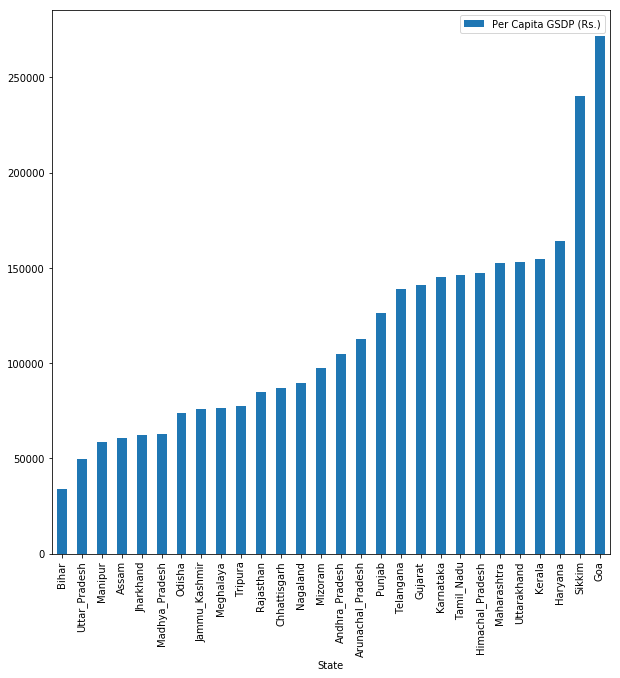

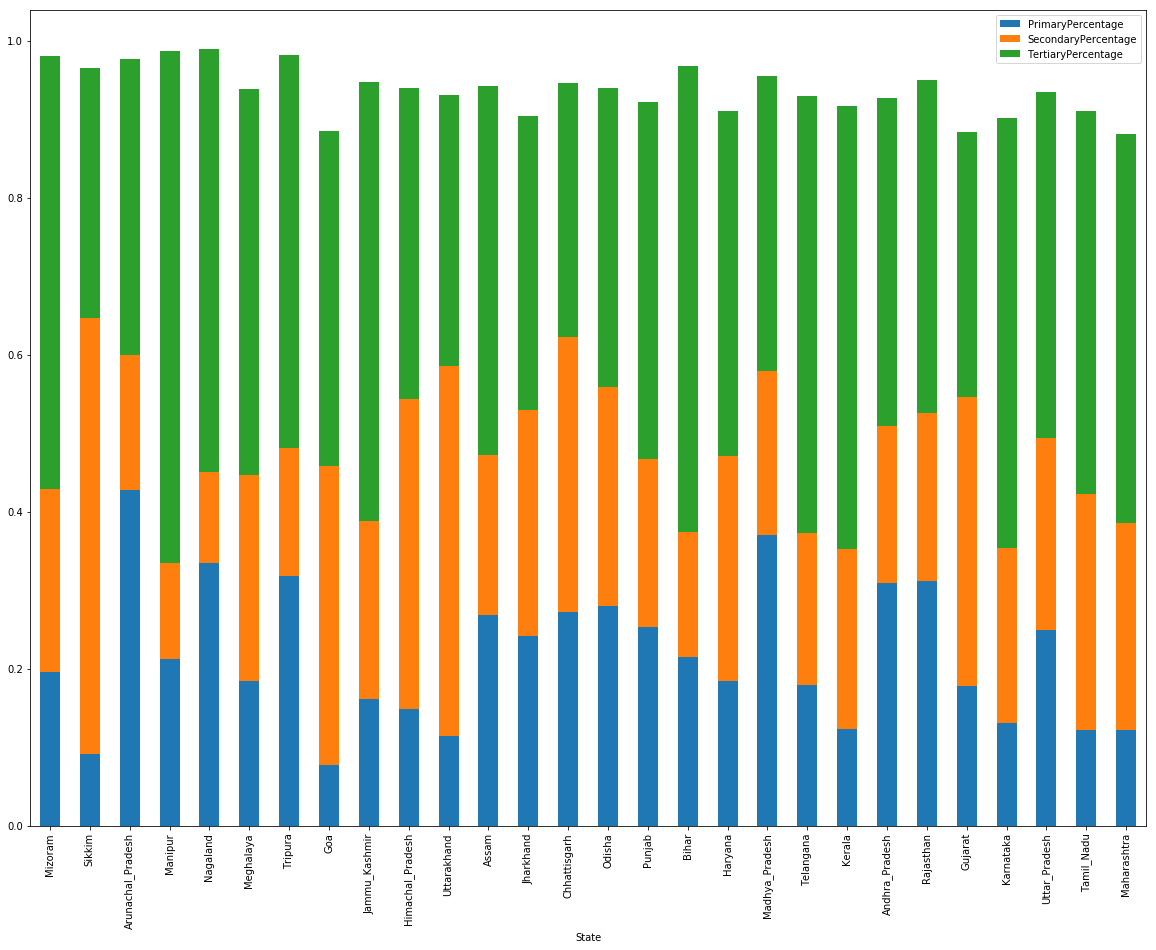

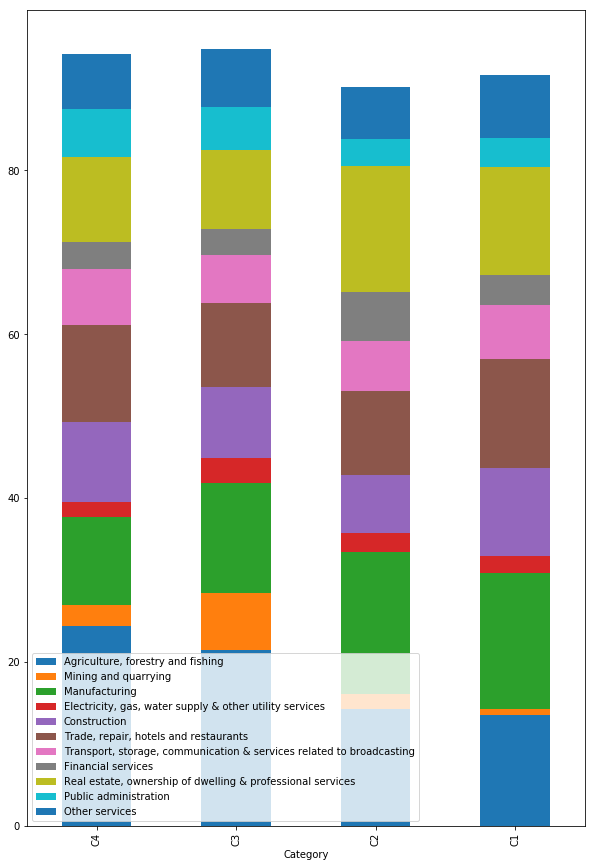

In [15]:
import pandas as pd
import glob,os

# Path of the file
path=r'GDP Data\\Data I-B\\'
# Getting all the files with extension csv
all_files=glob.glob(path + "\*.csv")
# Empty list
li=[]
# Loop thru the files to populate each state data
for file_name in all_files:
    df= pd.read_csv(file_name,index_col=None,header=0,encoding='unicode_escape')
    
    # Selecting the needed columns
    df = df[['Item','2014-15']]
    # Transposing
    df = df.T
    new_header= df.iloc[0]
    df=df[1:]
    df.columns = new_header
    # Getting the state from the file anem
    df['State'] = file_name.split('\\')[-1].split('-')[1]
    # Adding the the list
    li.append(df)
# Concatenating the data from the list
frame = pd.concat(li,axis=0,ignore_index=True)

frame.head()
# Checking the columns
frame.columns
# Selecting only the needed fields
frame= frame[['Agriculture, forestry and fishing','Mining and quarrying','Primary','Manufacturing',
              'Electricity, gas, water supply & other utility services','Construction','Secondary',
             'Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting',
             'Financial services','Real estate, ownership of dwelling & professional services',
             'Public administration','Other services','Tertiary','Gross State Domestic Product','Per Capita GSDP (Rs.)','State']]
#Setting the state as the index
frame = frame.set_index('State')

# Removing the UTs
ut = ['Delhi','Andaman_Nicobar_Islands','Chandigarh','Puducherry']
frame = frame.drop(ut,axis=0)


# selecting the percapita
df_per = frame[['Per Capita GSDP (Rs.)']]
#Sorting based on percapita
df_per=df_per.sort_values(by=['Per Capita GSDP (Rs.)'])


# Top 5 - Goa,Sikkim,Haryana,Kerala,Uttarakhan
# Low 5 - Bihar,Uttarpradesh,Manipur,Assam,Jharkhand
df_per.plot(kind='bar',label='None',figsize=(10,10))


# ratio - 8.00
ratio = df_per.loc['Goa']/df_per.loc['Bihar']
ratio


# selecting the Sector and GSDP
df_section = frame[['Primary','Secondary','Tertiary','Gross State Domestic Product']]
# Sorting based on GSDP
df_section=df_section.sort_values(by=['Gross State Domestic Product'],ascending= True)
#calculating the percentage
df_section['PrimaryPercentage'] = df_section['Primary']/df_section['Gross State Domestic Product']
df_section['SecondaryPercentage'] = df_section['Secondary']/df_section['Gross State Domestic Product']
df_section['TertiaryPercentage'] = df_section['Tertiary']/df_section['Gross State Domestic Product']

# Plotting the stacked barchart based on percentage
df_section.loc[:,['PrimaryPercentage','SecondaryPercentage', 'TertiaryPercentage']].plot.bar(stacked=True, figsize=(20,15))

#Selecting the subsector
df_category = frame[['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing',
              'Electricity, gas, water supply & other utility services','Construction',
             'Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting',
             'Financial services','Real estate, ownership of dwelling & professional services',
             'Public administration','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)']]

#Categorize into multiple category based on the percapita GDP
df_category['Category'] = pd.qcut(df_category['Per Capita GSDP (Rs.)'],  [0., .20, .5, .85, 1.] , labels=['C4','C3','C2','C1'])

#Summing per category
df_category=df_category.groupby('Category').sum()


#calculating the subsector percentage
df_category['Agriculture, forestry and fishing'] = df_category['Agriculture, forestry and fishing']/df_category['Gross State Domestic Product'] * 100
df_category['Mining and quarrying'] = df_category['Mining and quarrying']/df_category['Gross State Domestic Product'] * 100
df_category['Manufacturing'] = df_category['Manufacturing']/df_category['Gross State Domestic Product'] * 100
df_category['Electricity, gas, water supply & other utility services'] = df_category['Electricity, gas, water supply & other utility services']/df_category['Gross State Domestic Product'] * 100
df_category['Construction'] = df_category['Construction']/df_category['Gross State Domestic Product'] * 100
df_category['Trade, repair, hotels and restaurants'] = df_category['Trade, repair, hotels and restaurants']/df_category['Gross State Domestic Product'] * 100
df_category['Transport, storage, communication & services related to broadcasting'] = df_category['Transport, storage, communication & services related to broadcasting']/df_category['Gross State Domestic Product'] * 100
df_category['Financial services'] = df_category['Financial services']/df_category['Gross State Domestic Product'] * 100
df_category['Real estate, ownership of dwelling & professional services'] = df_category['Real estate, ownership of dwelling & professional services']/df_category['Gross State Domestic Product'] * 100
df_category['Public administration'] = df_category['Public administration']/df_category['Gross State Domestic Product'] * 100
df_category['Other services'] = df_category['Other services']/df_category['Gross State Domestic Product'] * 100

# remove the GSDP ,Percapita
df_category =df_category.drop(columns=['Gross State Domestic Product', 'Per Capita GSDP (Rs.)'])

#Plot the chart
df_category.plot.bar(stacked=True, figsize=(10,15))


#Manufacturing,Agriculture, forestry and fishing,Trade, repair, hotels and restaurants,
#Real estate, ownership of dwelling & professional services,Construction,Other services,
#Transport, storage, communication & services related to broadcasting  
df_category.loc['C1'].sort_values(ascending=False).cumsum()
#Manufacturing,Real estate, ownership of dwelling & professional services,Agriculture, forestry and fishing,
#Trade, repair, hotels and restaurant,Construction,Other services ,Financial services,
#Transport, storage, communication & services related to broadcasting                               
df_category.loc['C2'].sort_values(ascending=False).cumsum()
#Agriculture, forestry and fishing,Manufacturing,Trade, repair, hotels and restaurants,
#Real estate, ownership of dwelling & professional services,Construction,Other services,
#Mining and quarrying,Transport, storage, communication & services related to broadcasting  
df_category.loc['C3'].sort_values(ascending=False).cumsum()

#Agriculture, forestry and fishing,Trade, repair, hotels and restaurants,Manufacturing,
#Real estate, ownership of dwelling & professional services,Construction,
#Transport, storage, communication & services related to broadcasting,Other services
df_category.loc['C4'].sort_values(ascending=False).cumsum()



/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Manufacturing                                                           16.613203
Agriculture, forestry and fishing                                       30.151965
Trade, repair, hotels and restaurants                                   43.474890
Real estate, ownership of dwelling & professional services              56.656687
Construction                                                            67.329055
Other services                                                          74.983684
Transport, storage, communication & services related to broadcasting    81.658792
Financial services                                                      85.317091
Public administration                                                   88.830787
Electricity, gas, water supply & other utility services                 90.891986
Mining and quarrying                                                    91.597577
Name: C4, dtype: float64

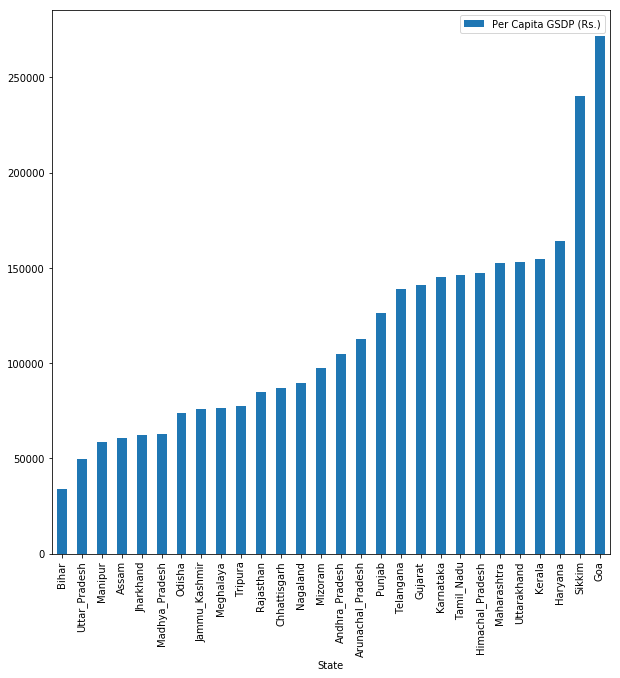

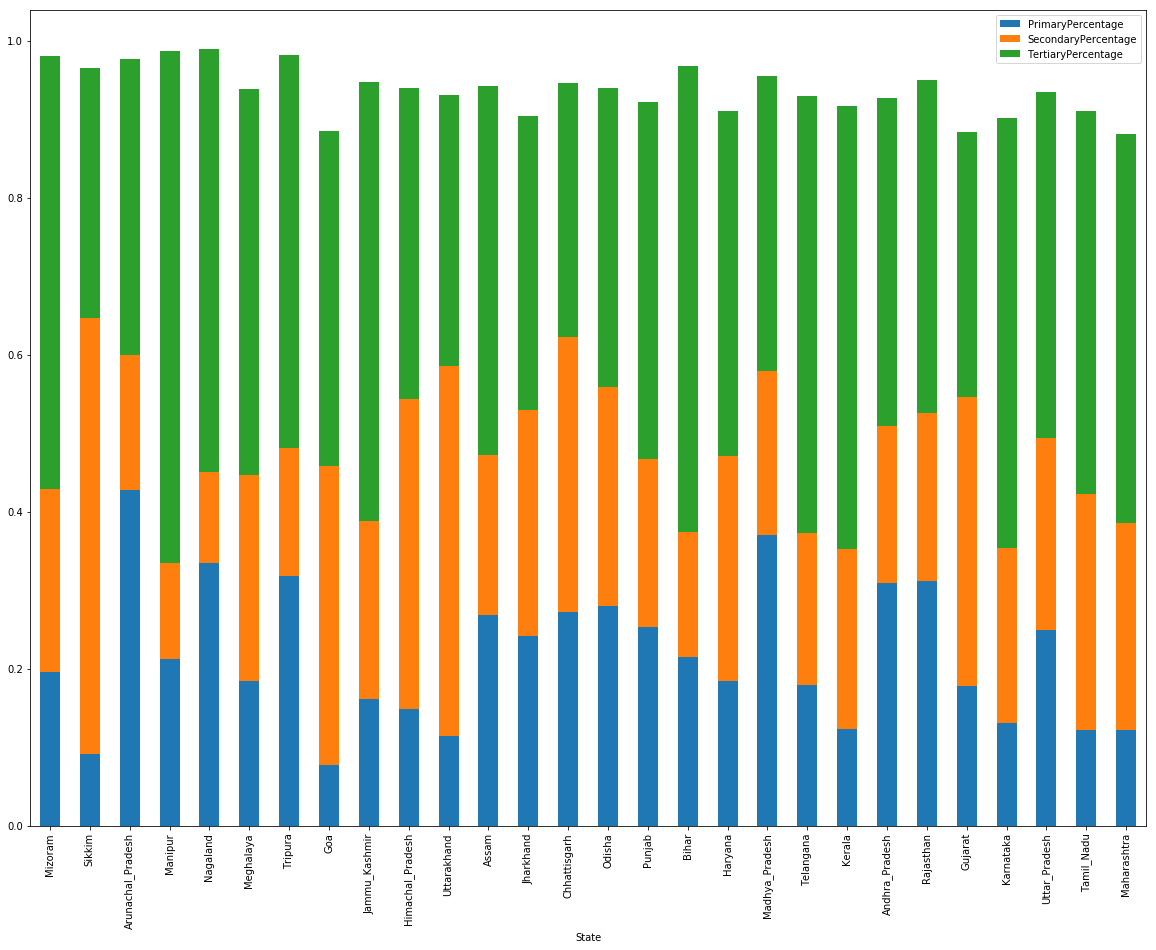

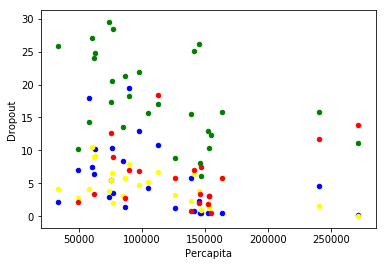

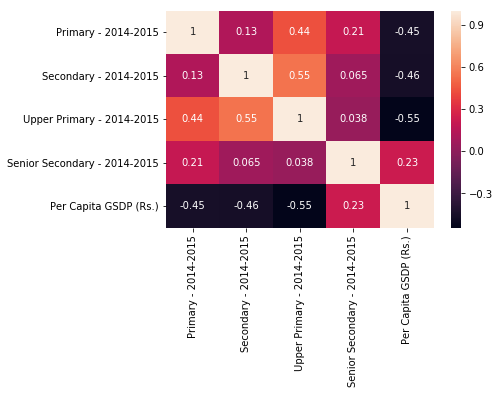

In [16]:
################## Education dropout 
# 2
# Read the csv
import seaborn as sns
import matplotlib.pyplot as plt
edu_drop = pd.read_csv("GDP Data\Data II.csv")

# Check the first few rows
edu_drop.head()

#Drop the unwanted columns
edu_drop=edu_drop[['Level of Education - State','Primary - 2014-2015','Secondary - 2014-2015','Upper Primary - 2014-2015','Senior Secondary - 2014-2015']]

#Rename the column name
edu_drop = edu_drop.rename(columns = {"Level of Education - State": "State"})

edu_drop['State'] = edu_drop['State'].replace(' ','_',regex=True)


edu_drop =edu_drop.replace(to_replace ="Jammu_and_Kashmir", 
                 value ="Jammu_Kashmir") 
edu_drop =edu_drop.replace(to_replace ="Chhatisgarh", 
                 value ="Chhattisgarh") 
edu_drop =edu_drop.replace(to_replace ="Uttrakhand", 
                 value ="Uttarakhand")


edu_drop = pd.merge(edu_drop,df_per,on=['State'])
edu_drop


# Convert type to numeric
edu_drop["Per Capita GSDP (Rs.)"] = pd.to_numeric(edu_drop["Per Capita GSDP (Rs.)"])

#Plot the scatter plot to get the distribution
ax=edu_drop.plot(kind='scatter', x='Per Capita GSDP (Rs.)', y='Primary - 2014-2015',color='Blue');
edu_drop.plot(kind='scatter', x='Per Capita GSDP (Rs.)', y='Secondary - 2014-2015',color='Green',ax=ax);
edu_drop.plot(kind='scatter', x='Per Capita GSDP (Rs.)', y='Upper Primary - 2014-2015',color='Yellow',ax=ax);
edu_drop.plot(kind='scatter', x='Per Capita GSDP (Rs.)', y='Senior Secondary - 2014-2015',color='Red',ax=ax);
ax.set_xlabel("Percapita")
ax.set_ylabel("Dropout")

plt.show()

#correlation matrix
sns.heatmap(edu_drop.corr(), xticklabels=edu_drop.corr().columns, yticklabels=edu_drop.corr().columns, annot=True)



In [13]:
True

True

In [11]:
True

True

In [12]:
True

True